# KNN 
This problem set have data that is ready to feed to machine learning algorithm.There is no need of data cleaning feature extractions etc etc.This is more of the practice for algortith implementation.

I am going to use k nearest neighbour with differnet values of K.This is my first use of KNN.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labeled_group = train.groupby('label')

total_observation = len(train['label'])
for label in range(0,10):
    print('Relative frequency of {} = {:.3f} %'.format(label,labeled_group['label'].get_group(label).count()/total_observation*100))

Relative frequency of 0 = 9.838 %
Relative frequency of 1 = 11.152 %
Relative frequency of 2 = 9.945 %
Relative frequency of 3 = 10.360 %
Relative frequency of 4 = 9.695 %
Relative frequency of 5 = 9.036 %
Relative frequency of 6 = 9.850 %
Relative frequency of 7 = 10.479 %
Relative frequency of 8 = 9.674 %
Relative frequency of 9 = 9.971 %


In [5]:
train.shape

(42000, 785)

# Splitting traing data
I would like to split the traing data in two parts.One for traing and another for testing.Since testing can't be done on test data because it is not lablelled.

Since our data is divided in groups we should perform **stratified sampling**,because it takes data sample from each group.

In case of simple random sampling it is possible that our traing set may have data points from one group in large number and some other group in very small amount.In this case sample population will not be the true representation of total popuplation.And our model can be biased.

In [6]:
from sklearn.cross_validation import StratifiedShuffleSplit

X = train.drop(['label'], axis = 1)
y = train['label']

sss = StratifiedShuffleSplit(y, n_iter=3, test_size=0.2)

for train_index, test_index in sss:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]    

In [7]:
print(X_train.shape)
print(X_test.shape)

(33601, 784)
(8399, 784)


In [8]:
print(y_train.shape)
print(y_test.shape)

(33601,)
(8399,)


k 3 completed
k 4 completed
k 5 completed
k 6 completed


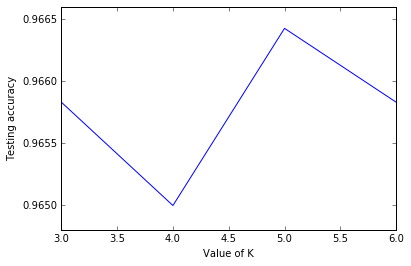

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#k_range = range(3,7)
#scores = []

# We are going to use differnt values of K as choose the best one as per accuracy_score
#for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train,y_train)
    #y_pred = knn.predict(X_test)
    #scores.append(accuracy_score(y_test,y_pred))
    #print('k {} completed'.format(k))
    

# Plotting testing accuracy
#plt.plot(k_range,scores)
#plt.xlabel('Value of K')
#plt.ylabel('Testing accuracy')

Accuracy is maximum for k=5 and after that accuracy decreases for increase in k

# Traing the model on whole traing data
We don't want to waste the valuable training data,so we retrain our model on the entire training data with K = 5

In [11]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(X.shape)
print(y.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [13]:
#X = train.drop(['label'], axis = 1)
#y = train['label']

# Model training on entire train data
# final prediction for test data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(test)

In [15]:
# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(test)+1)), 
              "Label": y_pred}).to_csv('Digit_recogniser.csv', index=False,header=True)